In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import cv2
import imutils
from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [2]:
gliomaDir = "../dataset/Training/glioma/"
gliomaList = os.listdir(gliomaDir)
gliomaSize = len(gliomaList)

meningiomaDir = "../dataset/Training/meningioma/"
meningiomaList = os.listdir(meningiomaDir)
meningiomaSize = len(meningiomaList)

notumorDir = "../dataset/Training/notumor/"
notumorList = os.listdir(notumorDir)
notumorSize = len(notumorList)

pituitaryDir = "../dataset/Training/pituitary/"
pituitaryList = os.listdir(pituitaryDir)
pituitarySize = len(pituitaryList)

print (f"Glioma num is : "    ,gliomaSize)               
print (f"Meningioma num is : ",meningiomaSize)               
print (f"Notumor num is : "   ,notumorSize)               
print (f"Pituitary num is : " ,pituitarySize)               

Glioma num is :  1521
Meningioma num is :  1539
Notumor num is :  1595
Pituitary num is :  1557


Text(0.5, 1.0, 'Count of Brain Tumor Images')

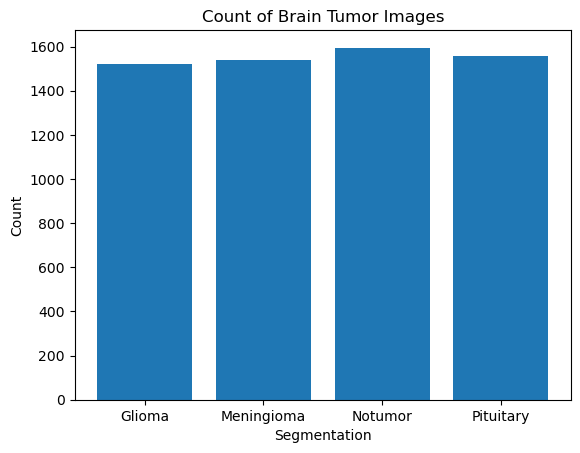

In [3]:
data = {'Glioma':gliomaSize,'Meningioma':meningiomaSize,'Notumor':notumorSize,'Pituitary':pituitarySize}
plt.bar(data.keys(),data.values())
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title("Count of Brain Tumor Images")

In [4]:
### The data are balanced to some extent, but for parctice, let us make data augmentation

In [5]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [6]:
def dataAugmentation(directory,numberOfnewImages,newname,initialNumber):
    generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                                   brightness_range=(0.3, 1.0),horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    counter = 0;
    number = int(initialNumber)
    for imageName in os.listdir(directory):
        #read the image
        image = cv2.imread(directory + '/' + imageName)
        image = image.reshape((1,) + image.shape) # Reshape the image to a format compatible with Keras 
        save_prefix  = newname + str(number)
        # print(newname)
        # print(number)
        # print(save_prefix)
        # print('----------')
        for batch in generator.flow(x = image, batch_size = 1, save_to_dir = directory, save_prefix = save_prefix, save_format = "jpg"):
            break
        counter+=1
        number+=1
        if(counter>=numberOfnewImages):
            break


In [7]:
# dataAugmentation(gliomaDir,200,'Tr-gl_',gliomaSize)
# dataAugmentation(meningiomaDir,200,'Tr-me_',meningiomaSize)
# dataAugmentation(pituitaryDir,100,'Tr-pi_',pituitarySize)

In [8]:
gliomaList = os.listdir(gliomaDir)
gliomaSize = len(gliomaList)

meningiomaList = os.listdir(meningiomaDir)
meningiomaSize = len(meningiomaList)

notumorList = os.listdir(notumorDir)
notumorSize = len(notumorList)

pituitaryList = os.listdir(pituitaryDir)
pituitarySize = len(pituitaryList)

print (f"Glioma num is : "    ,gliomaSize)               
print (f"Meningioma num is : ",meningiomaSize)               
print (f"Notumor num is : "   ,notumorSize)               
print (f"Pituitary num is : " ,pituitarySize)   

Glioma num is :  1521
Meningioma num is :  1539
Notumor num is :  1595
Pituitary num is :  1557


Text(0.5, 1.0, 'Count of Brain Tumor Images')

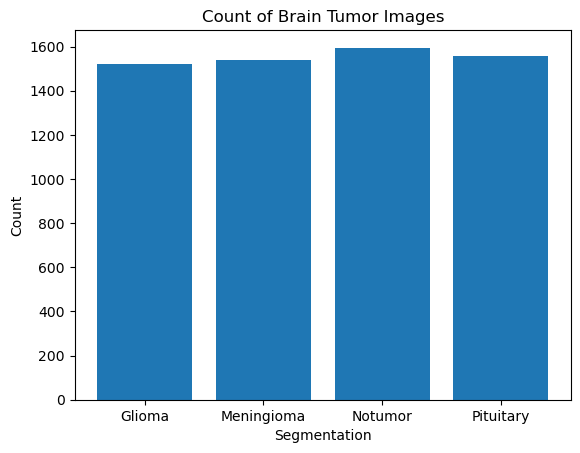

In [9]:
data = {'Glioma':gliomaSize,'Meningioma':meningiomaSize,'Notumor':notumorSize,'Pituitary':pituitarySize}
plt.bar(data.keys(),data.values())
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title("Count of Brain Tumor Images")

In [10]:
def crop_images(image):
    # convert to gray scale
    newImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # applay GaussianBlur for noise cancilation
    newImage = cv2.GaussianBlur(newImage,(5,5),0)

    thres = cv2.threshold(newImage, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)

    #Contour Detection
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    return new_image


In [12]:
for filename in os.listdir(gliomaDir):
    img = cv2.imread(gliomaDir + filename)
    img = crop_images(img)
    cv2.imwrite(gliomaDir + filename, img)

for filename in os.listdir(meningiomaDir):
    img = cv2.imread(meningiomaDir + filename)
    img = crop_images(img)
    cv2.imwrite(meningiomaDir + filename, img)

for filename in os.listdir(notumorDir):
    img = cv2.imread(notumorDir + filename)
    img = crop_images(img)
    cv2.imwrite(notumorDir + filename, img)

for filename in os.listdir(pituitaryDir):
    img = cv2.imread(pituitaryDir + filename)
    img = crop_images(img)
    cv2.imwrite(pituitaryDir + filename, img)
    


In [ ]:
# splited the data manually to be 80% 10% 10% training testing validating

In [ ]:
#image loading 

In [2]:
import os
import cv2
from sklearn.utils import shuffle

def load_data(dirlist, imageSize):
    X = []
    y = []
    w, h = imageSize
    for dir in dirlist:
        for filename in os.listdir(dir):
            image = cv2.imread(os.path.join(dir, filename))
            if image is not None:  # Checking if the image was read successfully
                image = cv2.resize(src=image, dsize=(w, h), interpolation=cv2.INTER_CUBIC)
                image = image / 255.0  # Normalize pixel values
                if "notumor" in dir:
                    X.append(image)
                    y.append(0)
                elif "glioma" in dir:
                    X.append(image)
                    y.append(1)
                elif "meningioma" in dir:
                    X.append(image)
                    y.append(2)
                elif "pituitary" in dir:
                    X.append(image)
                    y.append(3)
    X, y = shuffle(X, y)
    return X, y

In [3]:
dirlist = ["../dataset/Training/notumor/", "../dataset/Training/glioma/", "../dataset/Training/meningioma/", "../dataset/Training/pituitary/"]
size = (240, 240)
X_training, y_training = load_data(dirlist, size)

In [4]:
X_training = np.array(X_training)
y_training = np.array(y_training)

In [5]:
dirlist = ["../dataset/Testing/notumor/", "../dataset/Testing/glioma/", "../dataset/Testing/meningioma/", "../dataset/Testing/pituitary/"]
size = (240, 240)
X_testing, y_testing = load_data(dirlist, size)

In [6]:
dirlist = ["../dataset/Validating/notumor/", "../dataset/Validating/glioma/", "../dataset/Validating/meningioma/", "../dataset/Validating/pituitary/"]
size = (240, 240)
X_validating, y_validating = load_data(dirlist, size)

In [7]:
X_testing = np.array(X_testing)
y_testing = np.array(y_testing)
X_validating = np.array(X_validating)
y_validating = np.array(y_validating)

In [ ]:
# model building

In [3]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale = 1./255)
valid_data_gen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_data_gen.flow_from_directory('../dataset/Training/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 6212 images belonging to 4 classes.


In [16]:
test_generator = test_data_gen.flow_from_directory('../dataset/Testing/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 603 images belonging to 4 classes.


In [15]:
valid_generator = valid_data_gen.flow_from_directory('../dataset/Validating/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 708 images belonging to 4 classes.


In [18]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}
print(class_name)

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


In [22]:
# Load pre-trained VGG19 application model
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained weights
base_model.trainable = False

# Flatten the output of VGG19 base
flatten_layer = Flatten()(base_model.output)

# Add my own classification layers
dense1 = Dense(256, activation='relu')(flatten_layer)
dense2 = Dense(128, activation='relu')(dense1)

# Output layer
output_layer = Dense(4, activation='softmax')(dense2)

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,480,580 (101.02 MB)

 Trainable params: 6,456,196 (24.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)